___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

## Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Improt Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

# sklearn intelex
import numpy as np
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## Indest Data

In [3]:
df = pd.read_csv("Churn_Modelling.csv")

## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

Tenure:Number of years for which the customer has been with the bank
NumOfProducts :Number of bank products the customer is utilising   
Binary flag 1 if the customer closed account with bank and 0 if the customer is retained

In [4]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [8]:
df.isnull().sum().any()

False

In [9]:
df.duplicated().sum()

0

In [10]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

In [11]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [12]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



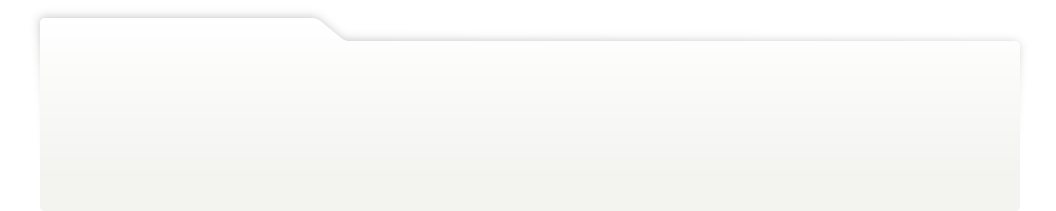
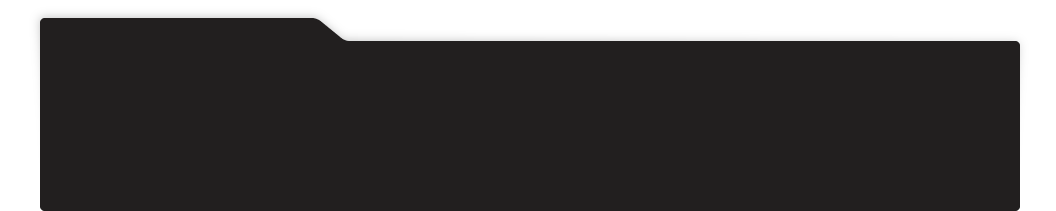
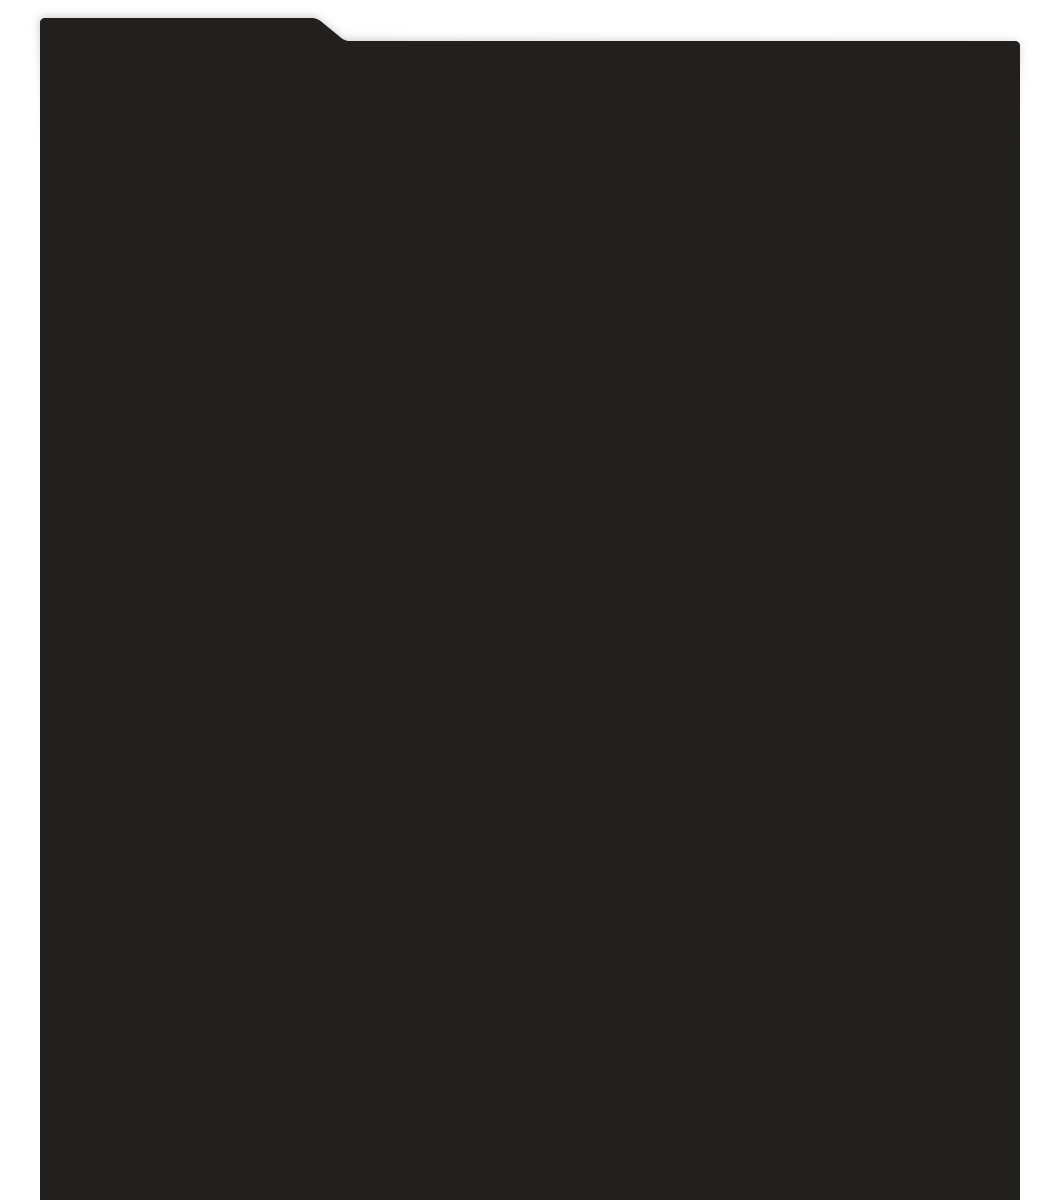
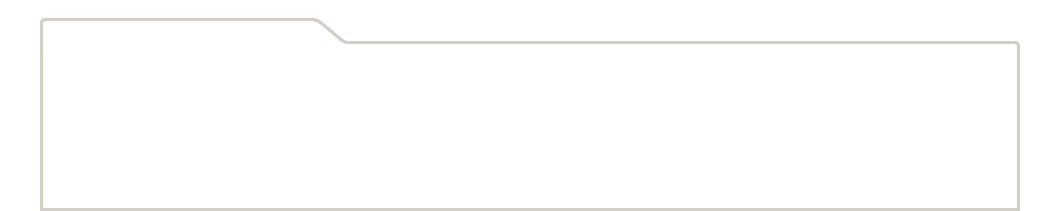
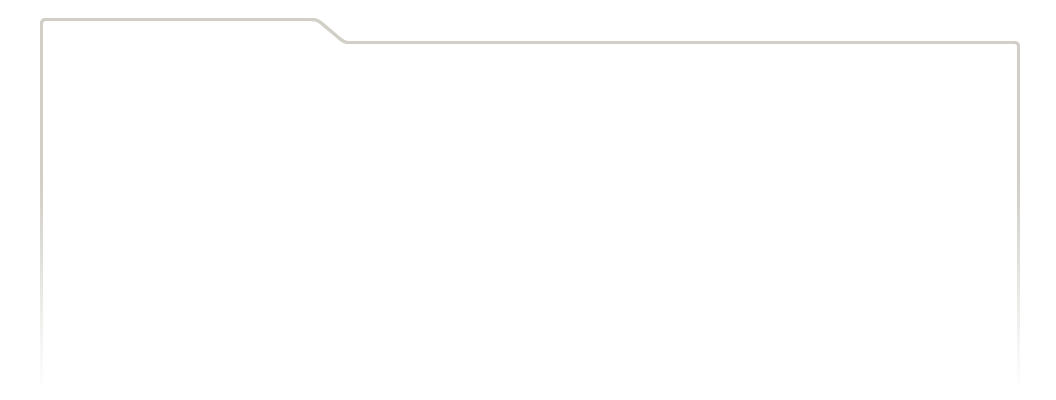
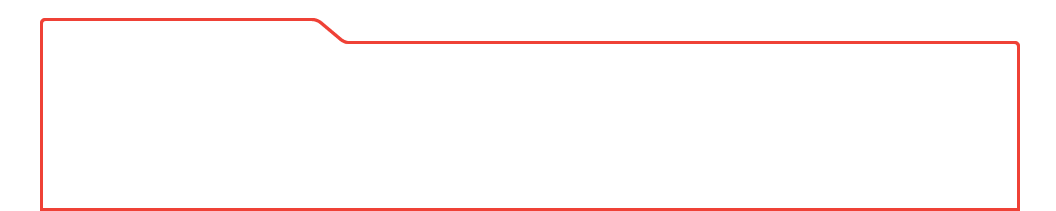
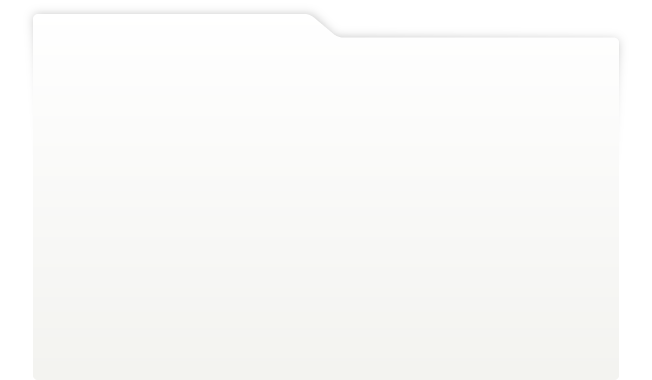
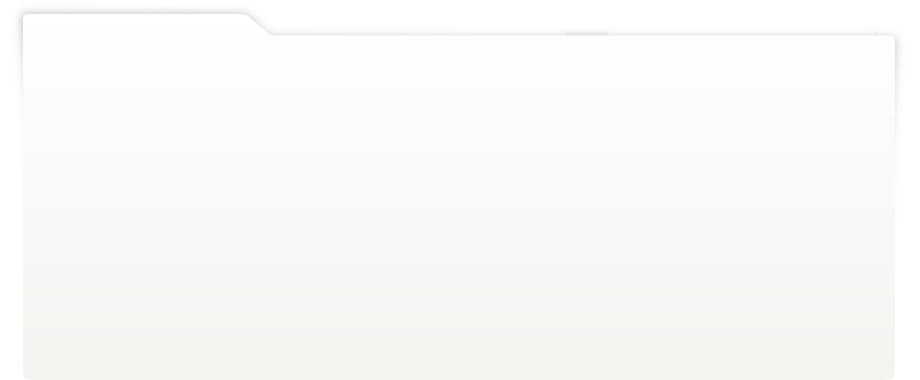
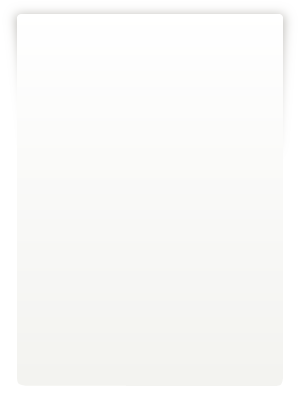
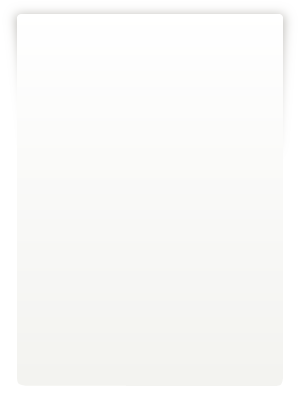
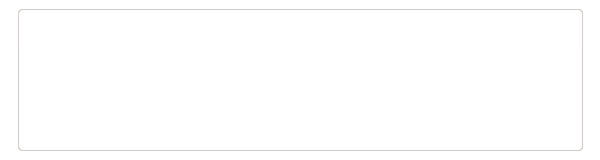
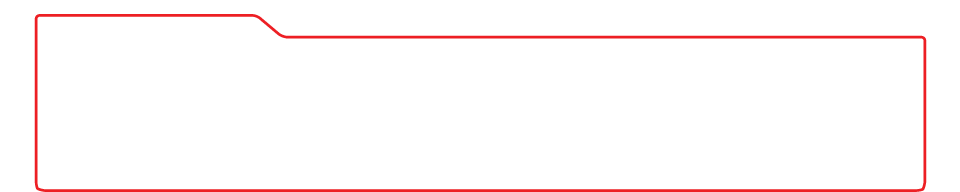
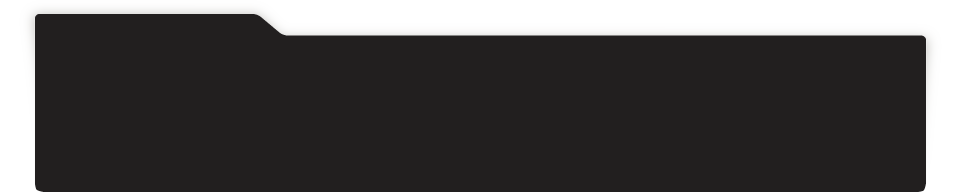
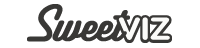
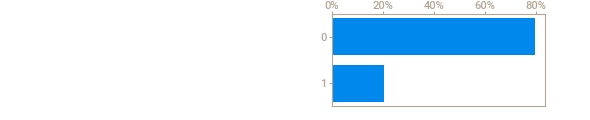
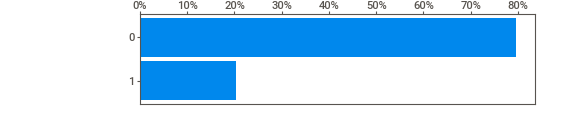
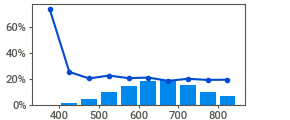
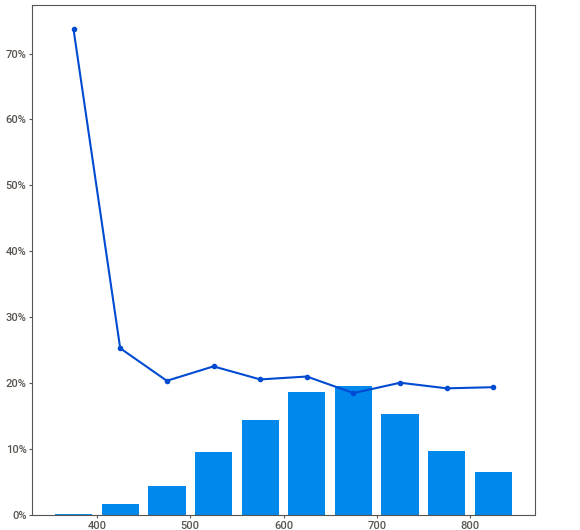
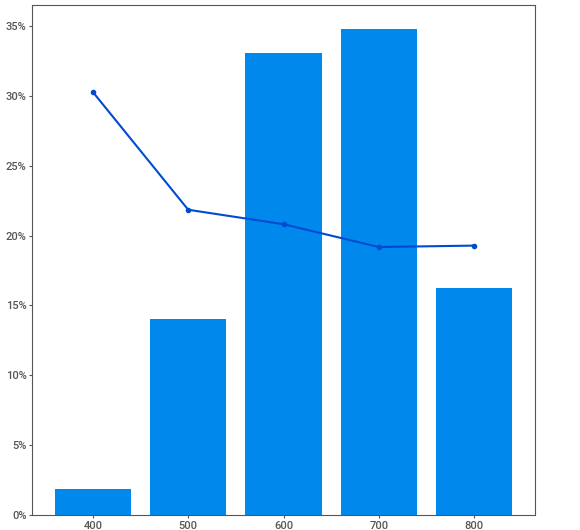
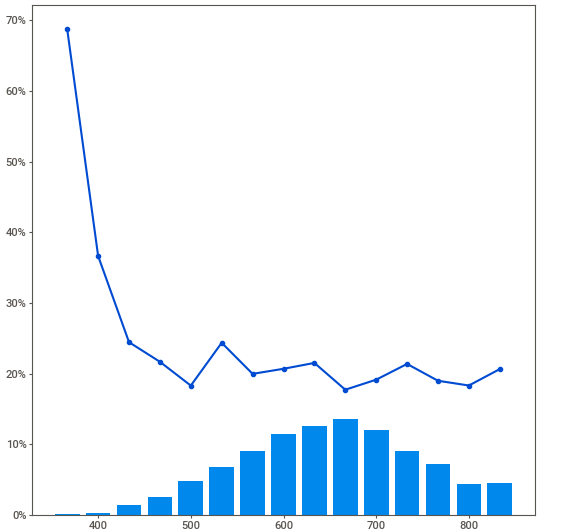
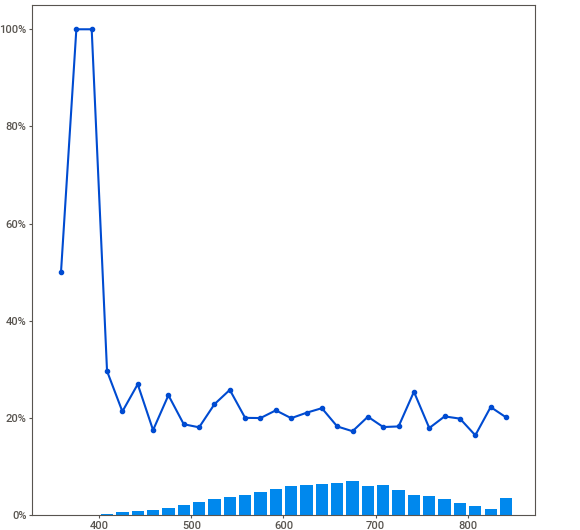
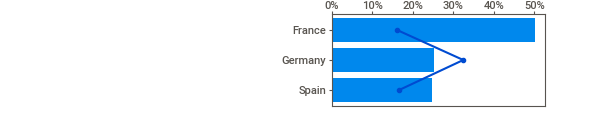
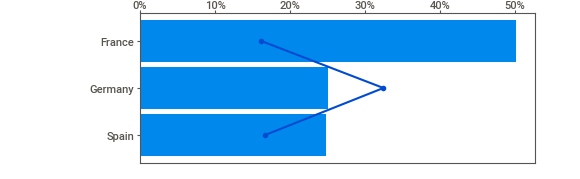
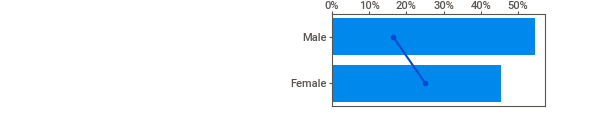
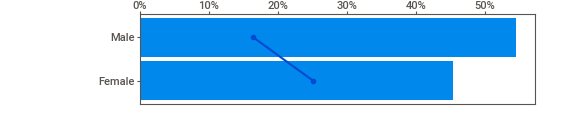
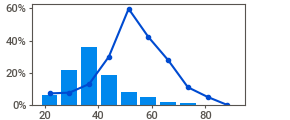
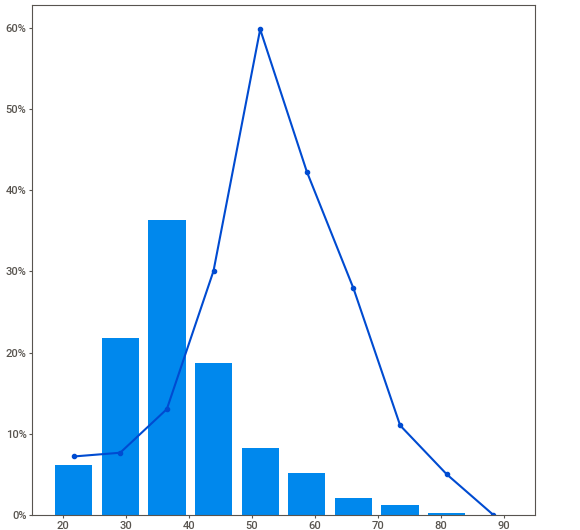
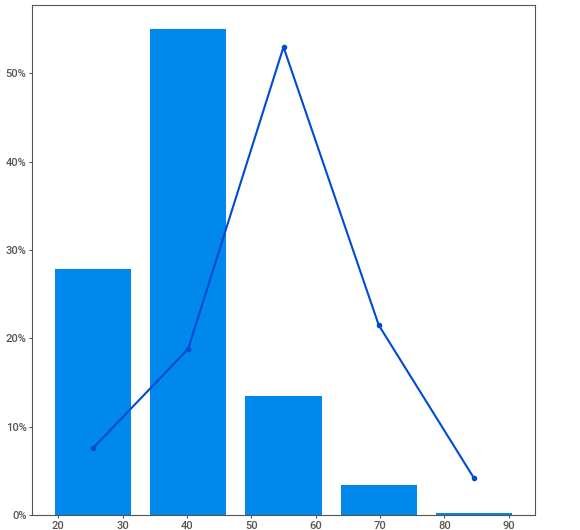
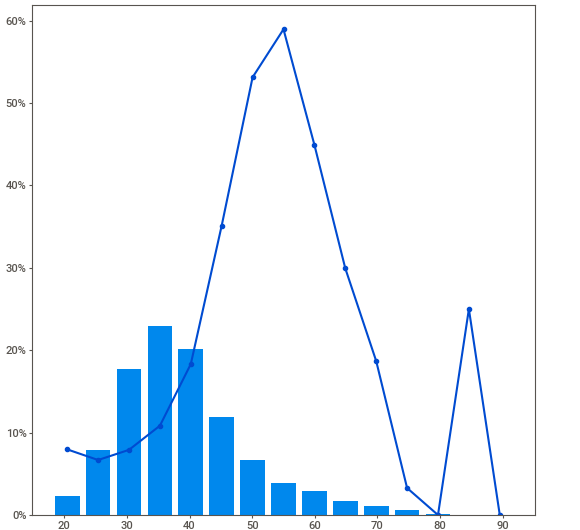
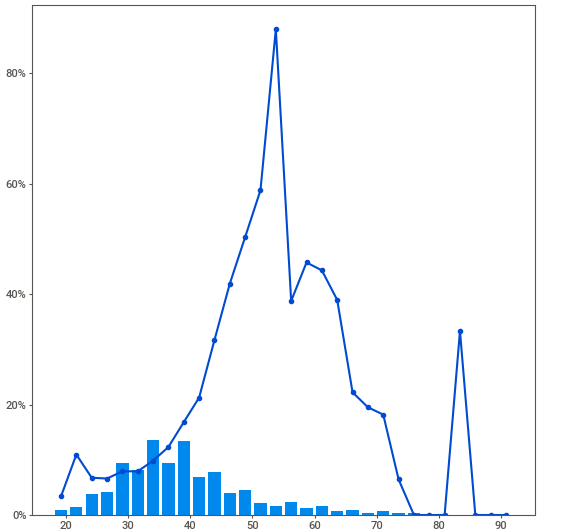
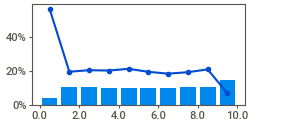
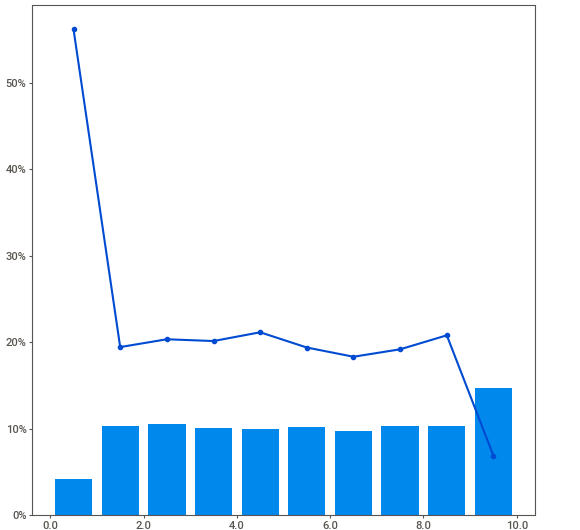
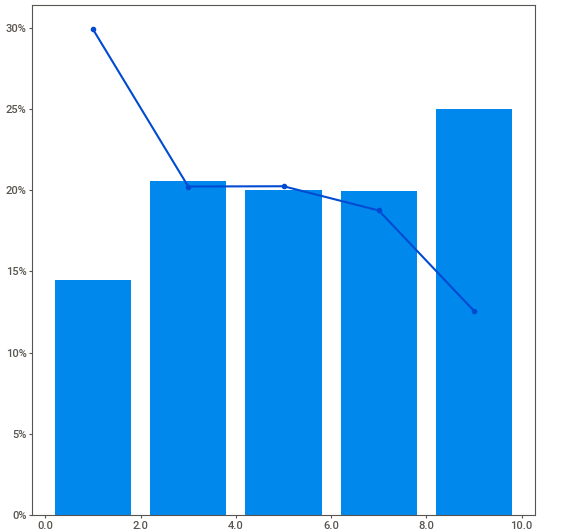
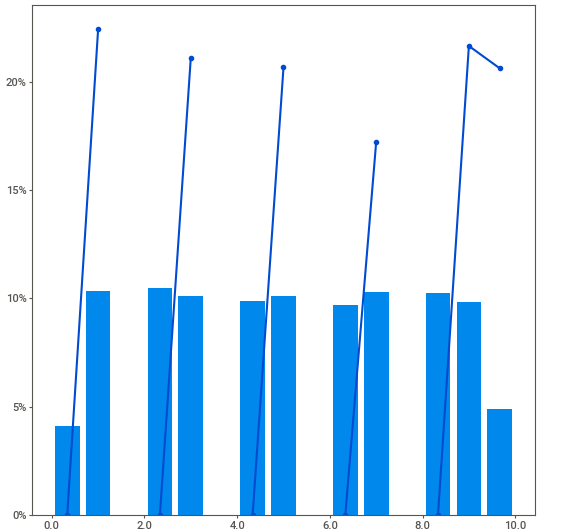
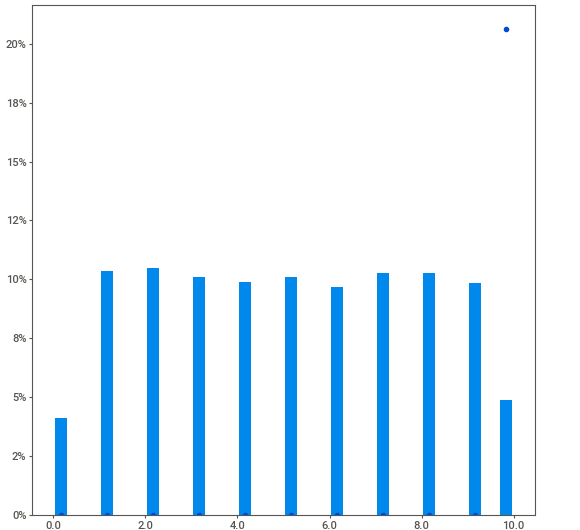
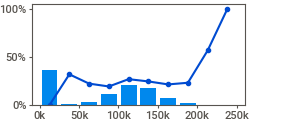
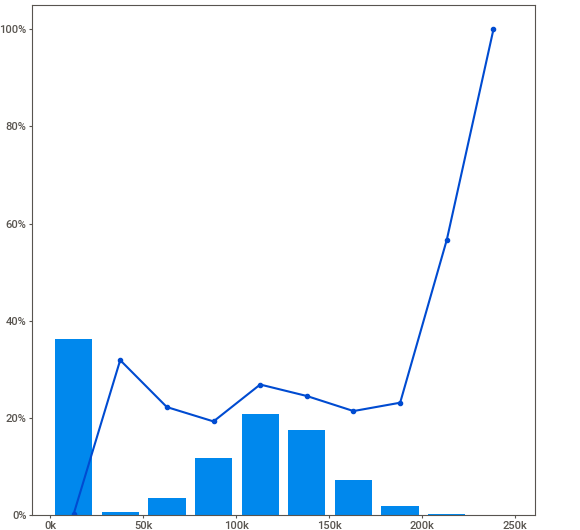
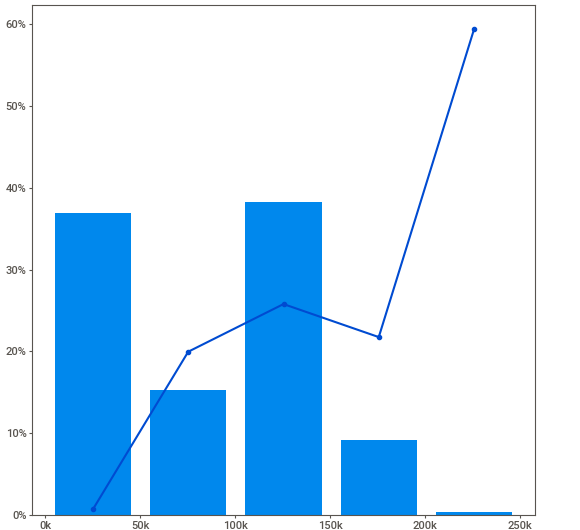
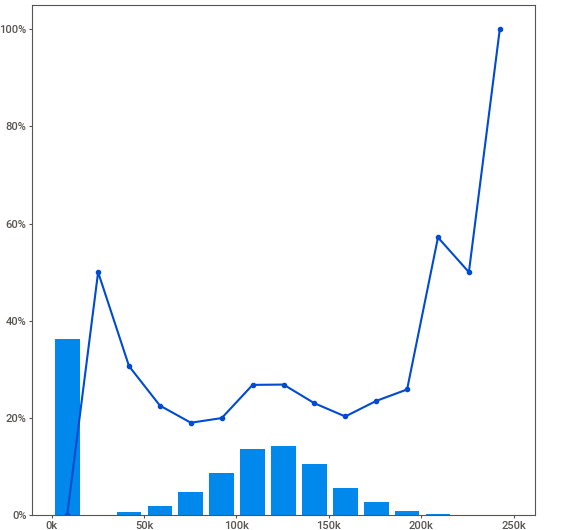
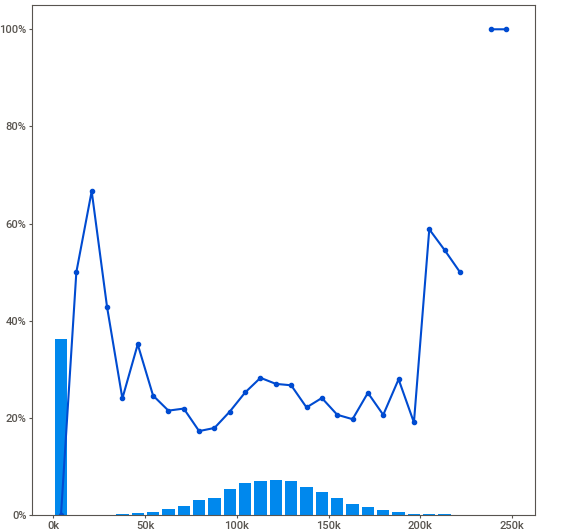
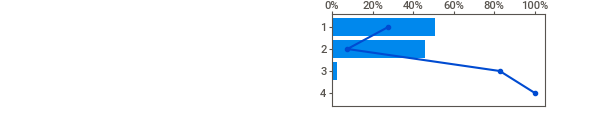
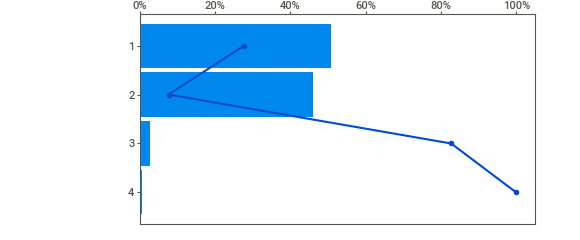
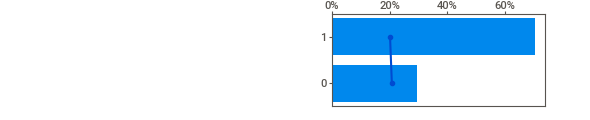
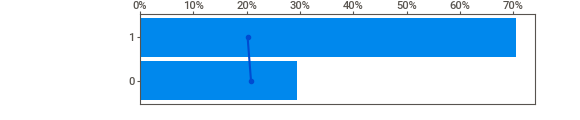
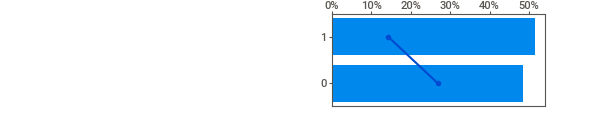
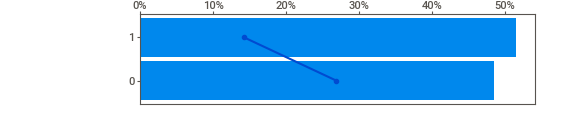
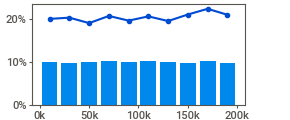
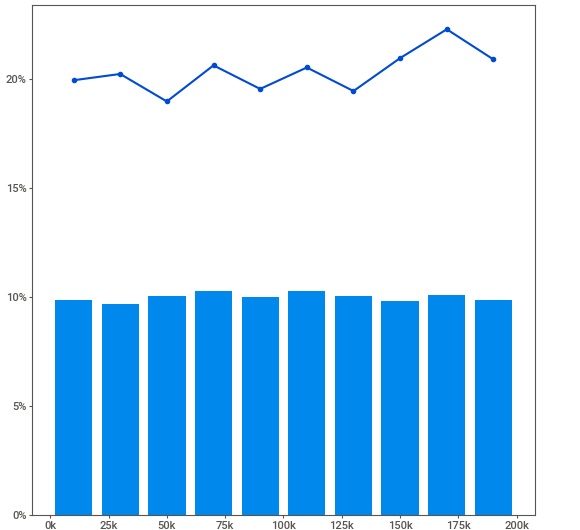
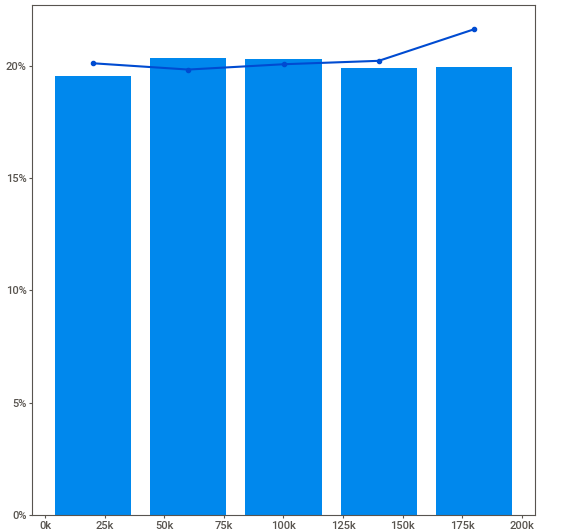
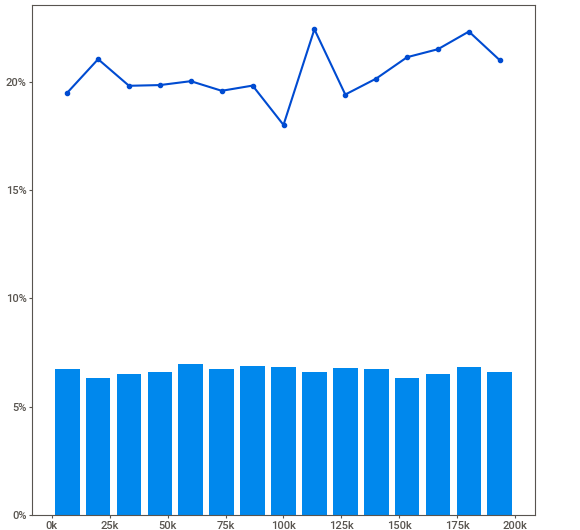
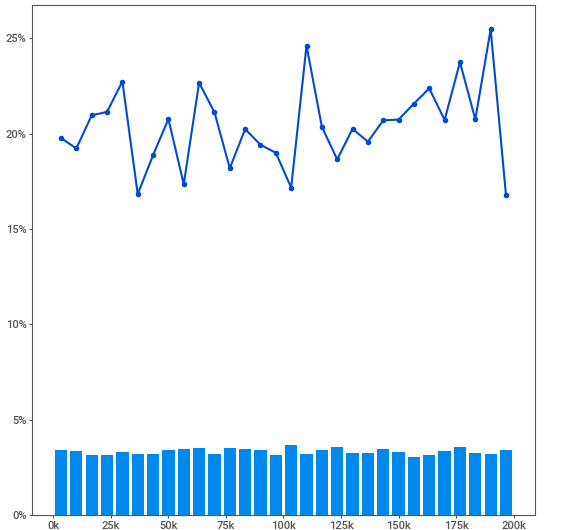
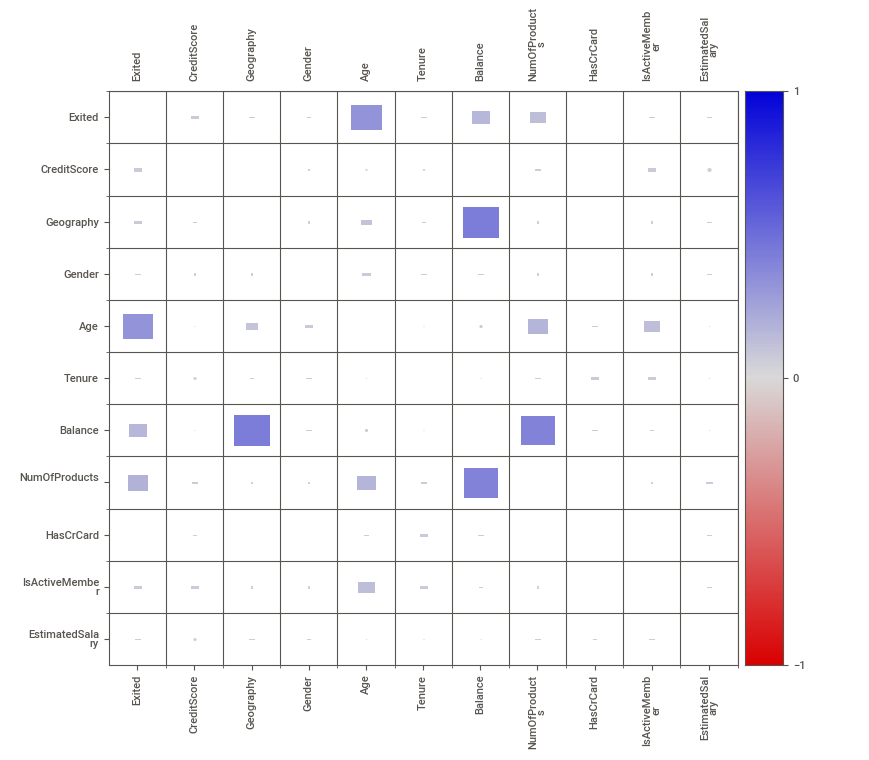
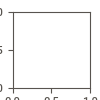

In [13]:
import sweetviz 

my_report = sweetviz.analyze([df, "original data"],target_feat='Exited')

my_report.show_notebook(layout="vertical", w ="980", h= 700, scale= .8)

In [14]:
df["CreditScore"].sort_values().unique()
# df.CreditScore.value_counts(dropna=False)

array([350, 351, 358, 359, 363, 365, 367, 373, 376, 382, 383, 386, 395,
       399, 401, 404, 405, 407, 408, 410, 411, 412, 413, 414, 415, 416,
       417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429,
       430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442,
       443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455,
       456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468,
       469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481,
       482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494,
       495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507,
       508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520,
       521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533,
       534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546,
       547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559,
       560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 57

In [15]:
# df["Geography"].sort_values().unique()
df.Geography.value_counts(dropna=False)

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [16]:
# df["Gender"].sort_values().unique()
df.Gender.value_counts(dropna=False)
 

Male      5457
Female    4543
Name: Gender, dtype: int64

In [17]:
df["Age"].sort_values().unique()
# df.Age.value_counts(dropna=False)

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       88, 92], dtype=int64)

In [18]:
# df["Tenure"].sort_values().unique()
df.Tenure.value_counts(dropna=False)

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [19]:
# df["Balance"].sort_values().unique()
df.Balance.value_counts(dropna=False)

0.000         3617
130170.820       2
105473.740       2
85304.270        1
159397.750       1
              ... 
81556.890        1
112687.690       1
108698.960       1
238387.560       1
130142.790       1
Name: Balance, Length: 6382, dtype: int64

In [20]:
# df["NumOfProducts"].sort_values().unique()
df.NumOfProducts.value_counts(dropna=False)

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [21]:
# df["EstimatedSalary"].sort_values().unique()
df.EstimatedSalary.value_counts(dropna=False)

24924.920     2
101348.880    1
55313.440     1
72500.680     1
182692.800    1
             ..
120893.070    1
188377.210    1
55902.930     1
4523.740      1
38190.780     1
Name: EstimatedSalary, Length: 9999, dtype: int64

In [22]:
# df["HasCrCard"].sort_values().unique()
df.HasCrCard.value_counts(dropna=False)

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [23]:
# df["IsActiveMember"].sort_values().unique()
df.IsActiveMember.value_counts(dropna=False)

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [24]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [25]:
missing (df)
#df.isnull().sum()
# df.isnull().sum()/len(df) 

,Missing_Number,Missing_Percent
CreditScore,0,0.000
Geography,0,0.000
Gender,0,0.000
Age,0,0.000
Tenure,0,0.000
Balance,0,0.000
NumOfProducts,0,0.000
HasCrCard,0,0.000
IsActiveMember,0,0.000
EstimatedSalary,0,0.000


In [26]:
df_temp = df.corr() 

feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .90 and df_temp[col][i] < 1) or (df_temp[col][i]< -.90 and df_temp[col][i] > -1) : 
                feature.append(col)
                collinear.append(i)
                print(f"multicolinearity alert in between {col} - {i}")

In [27]:
df_temp

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000,-0.004,0.001,0.006,0.012,-0.005,0.026,-0.001,-0.027
Age,-0.004,1.000,-0.010,0.028,-0.031,-0.012,0.085,-0.007,0.285
Tenure,0.001,-0.010,1.000,-0.012,0.013,0.023,-0.028,0.008,-0.014
Balance,0.006,0.028,-0.012,1.000,-0.304,-0.015,-0.010,0.013,0.119
NumOfProducts,0.012,-0.031,0.013,-0.304,1.000,0.003,0.010,0.014,-0.048
HasCrCard,-0.005,-0.012,0.023,-0.015,0.003,1.000,-0.012,-0.010,-0.007
IsActiveMember,0.026,0.085,-0.028,-0.010,0.010,-0.012,1.000,-0.011,-0.156
EstimatedSalary,-0.001,-0.007,0.008,0.013,0.014,-0.010,-0.011,1.000,0.012
Exited,-0.027,0.285,-0.014,0.119,-0.048,-0.007,-0.156,0.012,1.000


In [28]:
# df["Exited"].sort_values().unique()
df.Exited.value_counts(dropna=False)

0    7963
1    2037
Name: Exited, dtype: int64

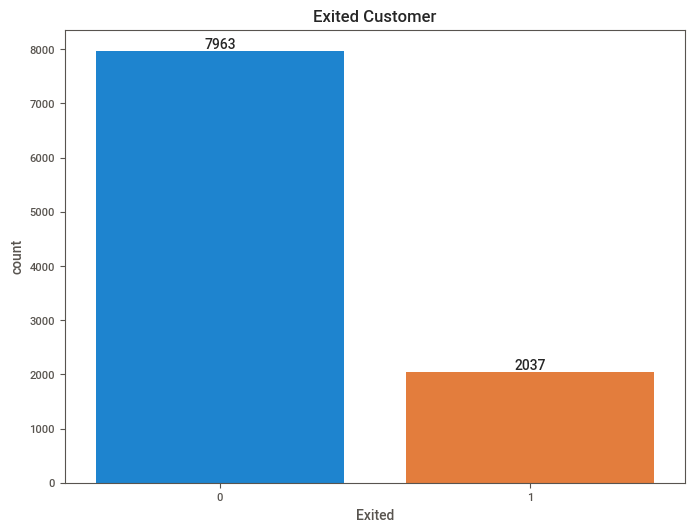

In [29]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x ='Exited', data = df)
plt.title('Exited Customer')
ax.bar_label(ax.containers[0]);

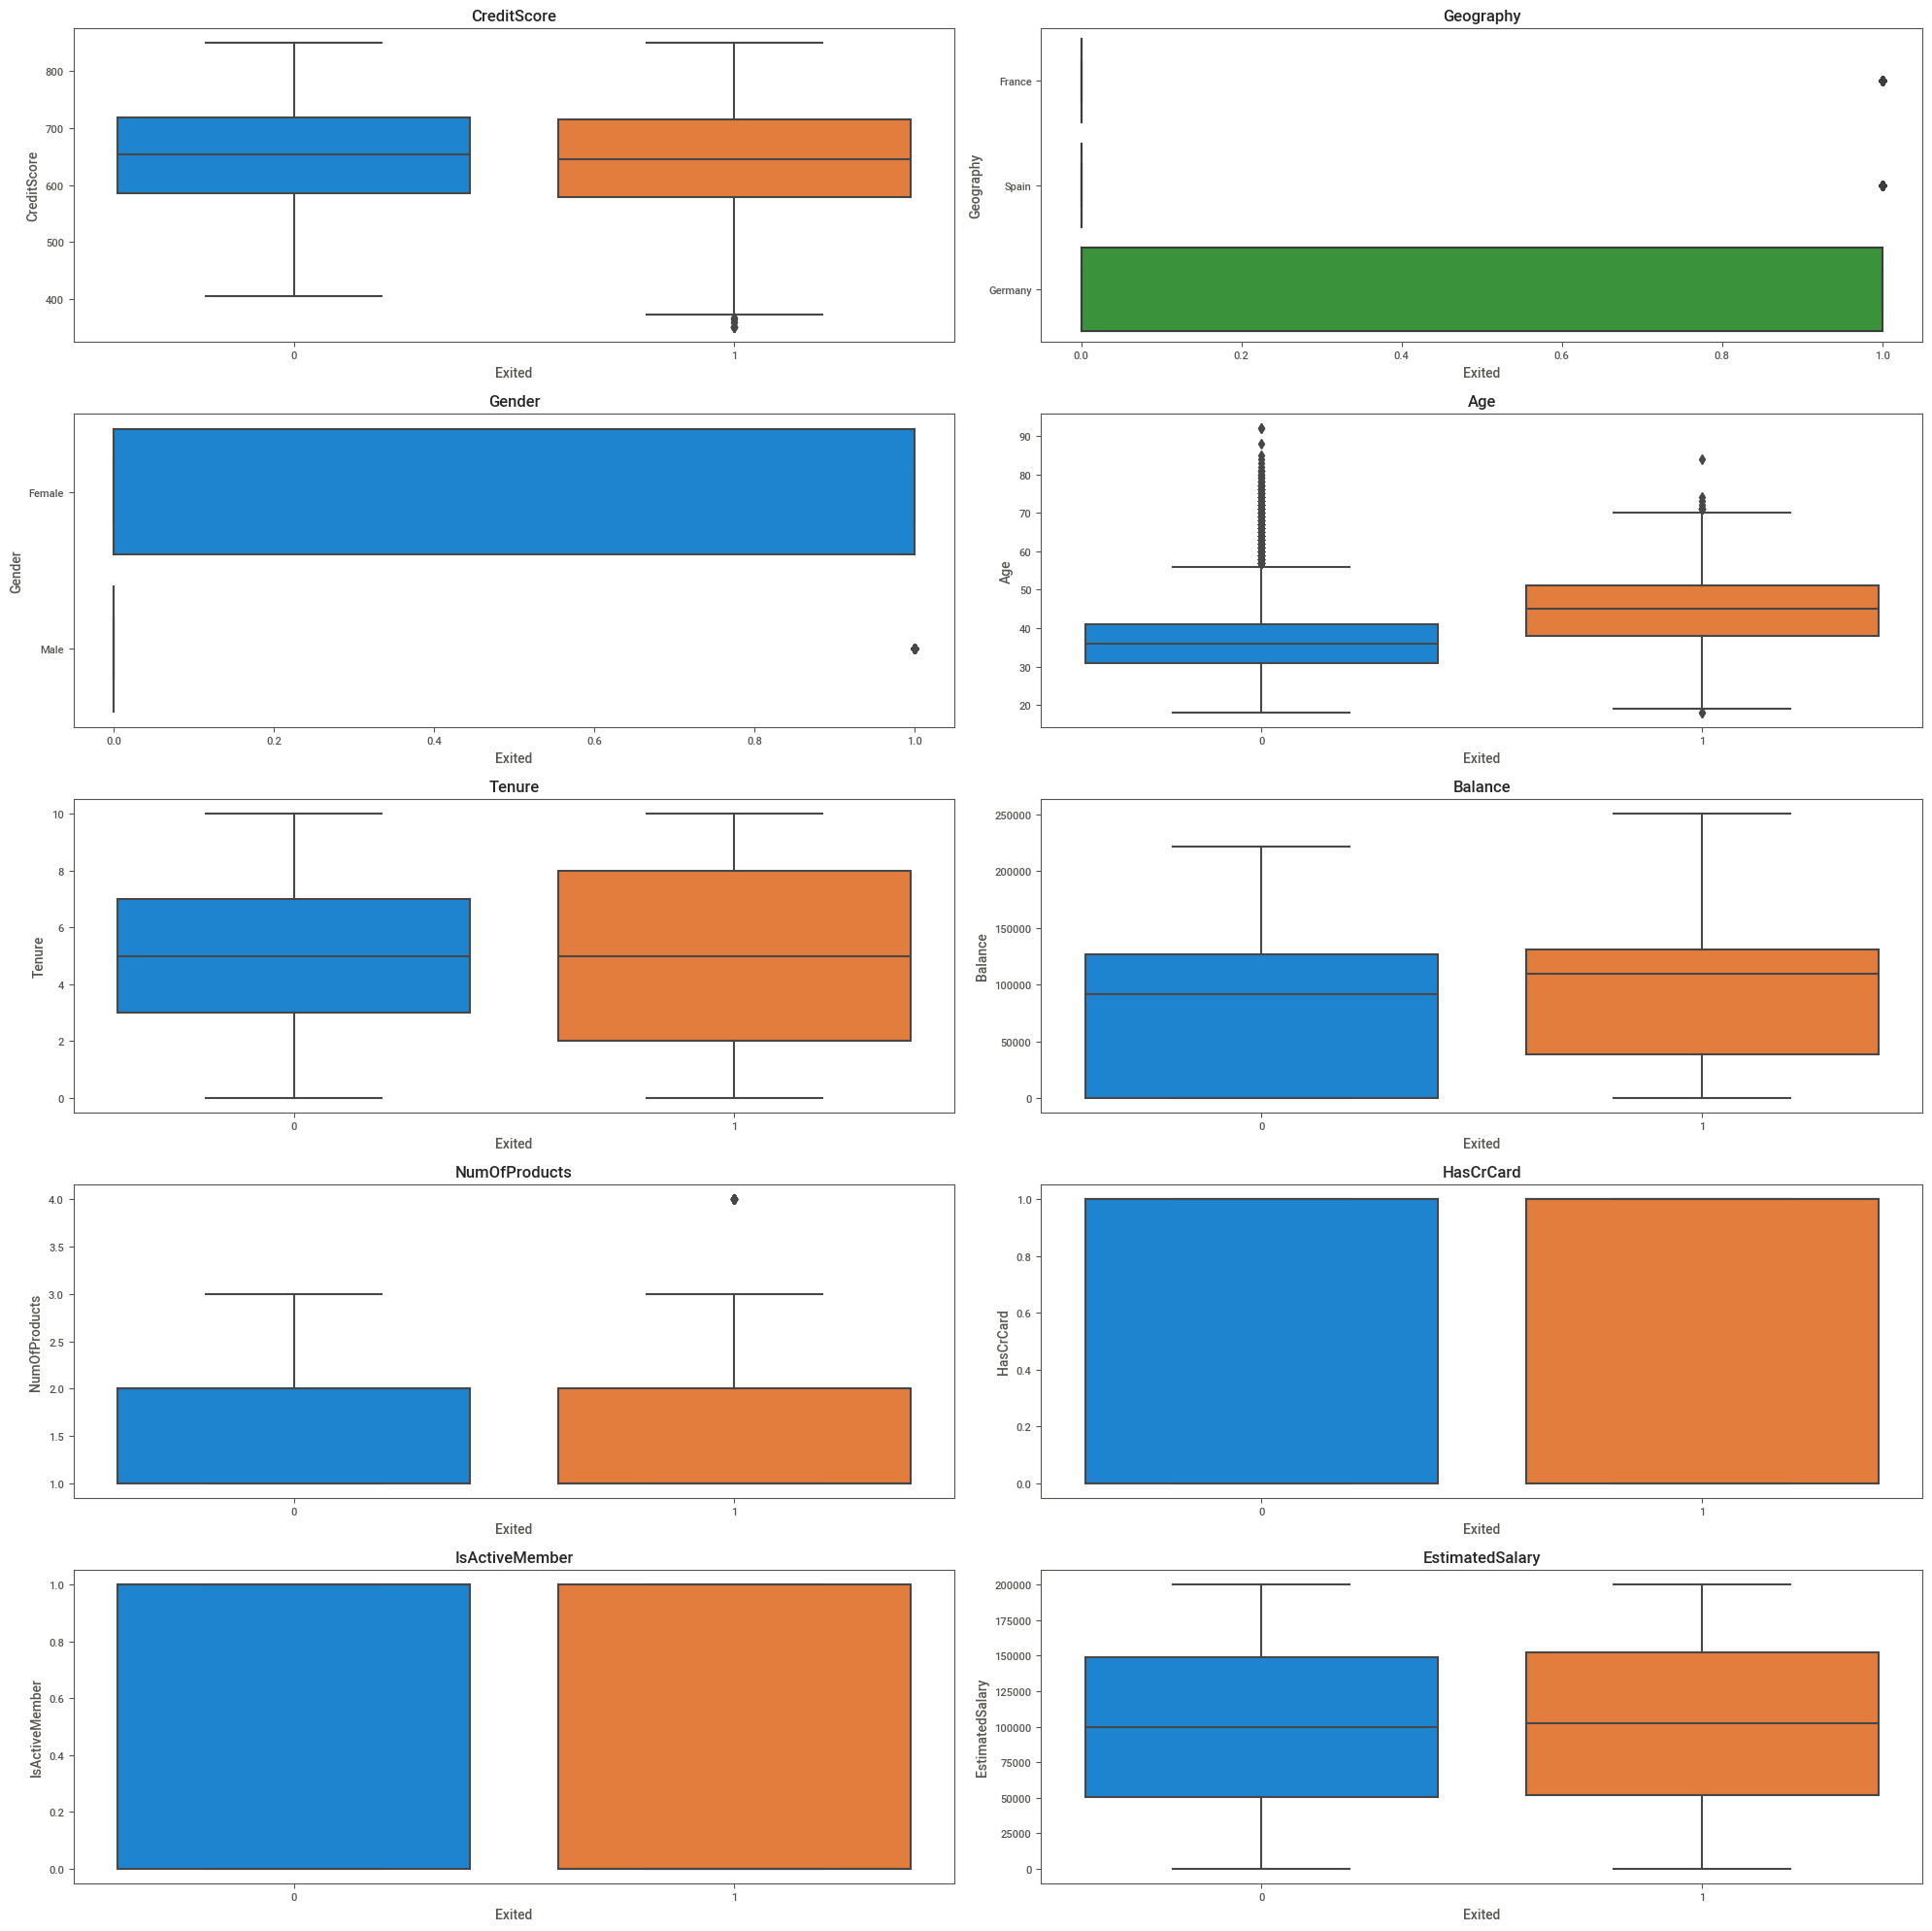

In [30]:
plt.figure(figsize=(20,20))
for i,col in enumerate(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],1):
    plt.subplot(5,2,i)
    # print("-----------",i,"--",col,"---------------")
    plt.title(col)
    sns.boxplot(y=df[col], x=df["Exited"])
    plt.tight_layout()

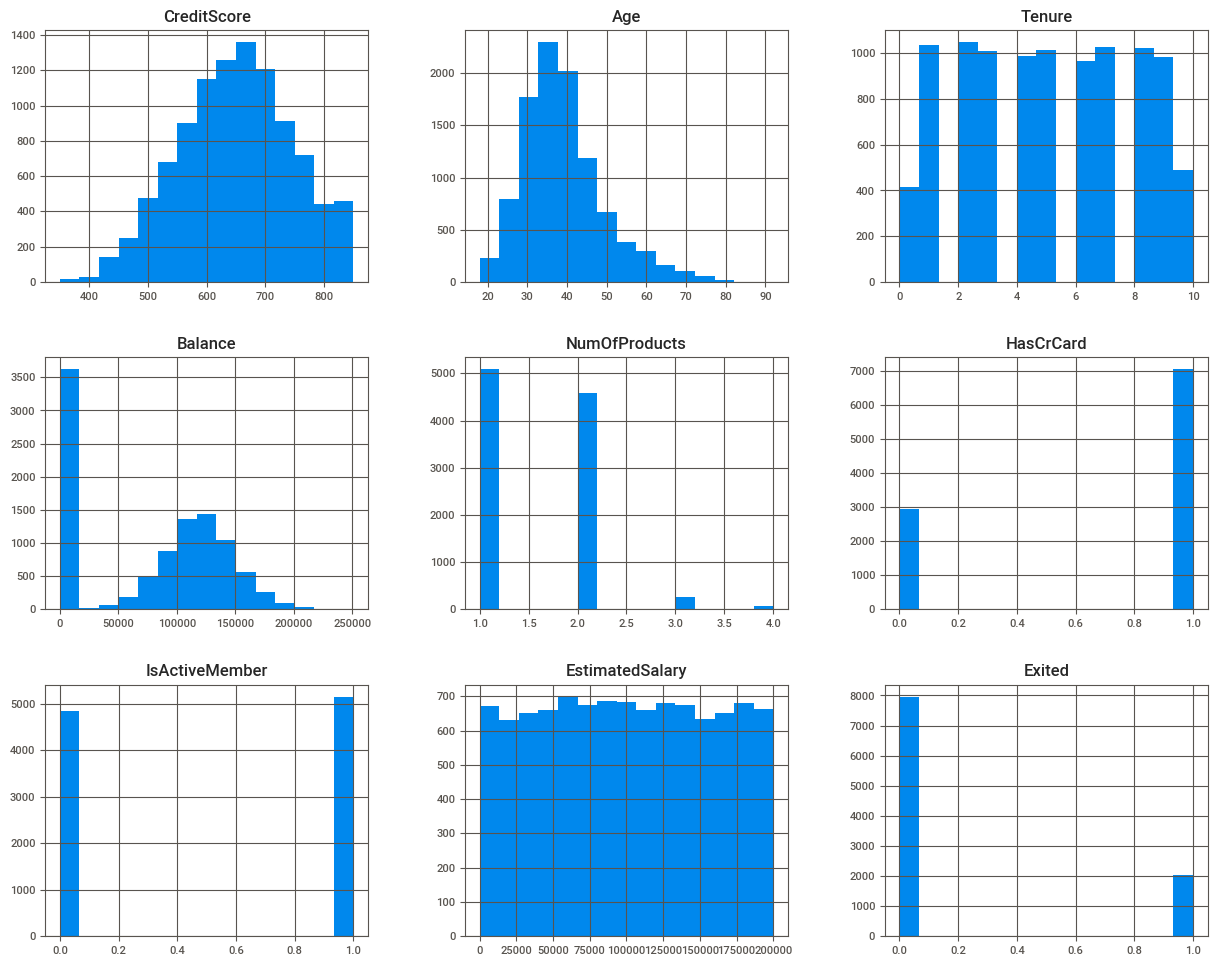

In [31]:
df.hist(figsize=(15, 12), bins=15);

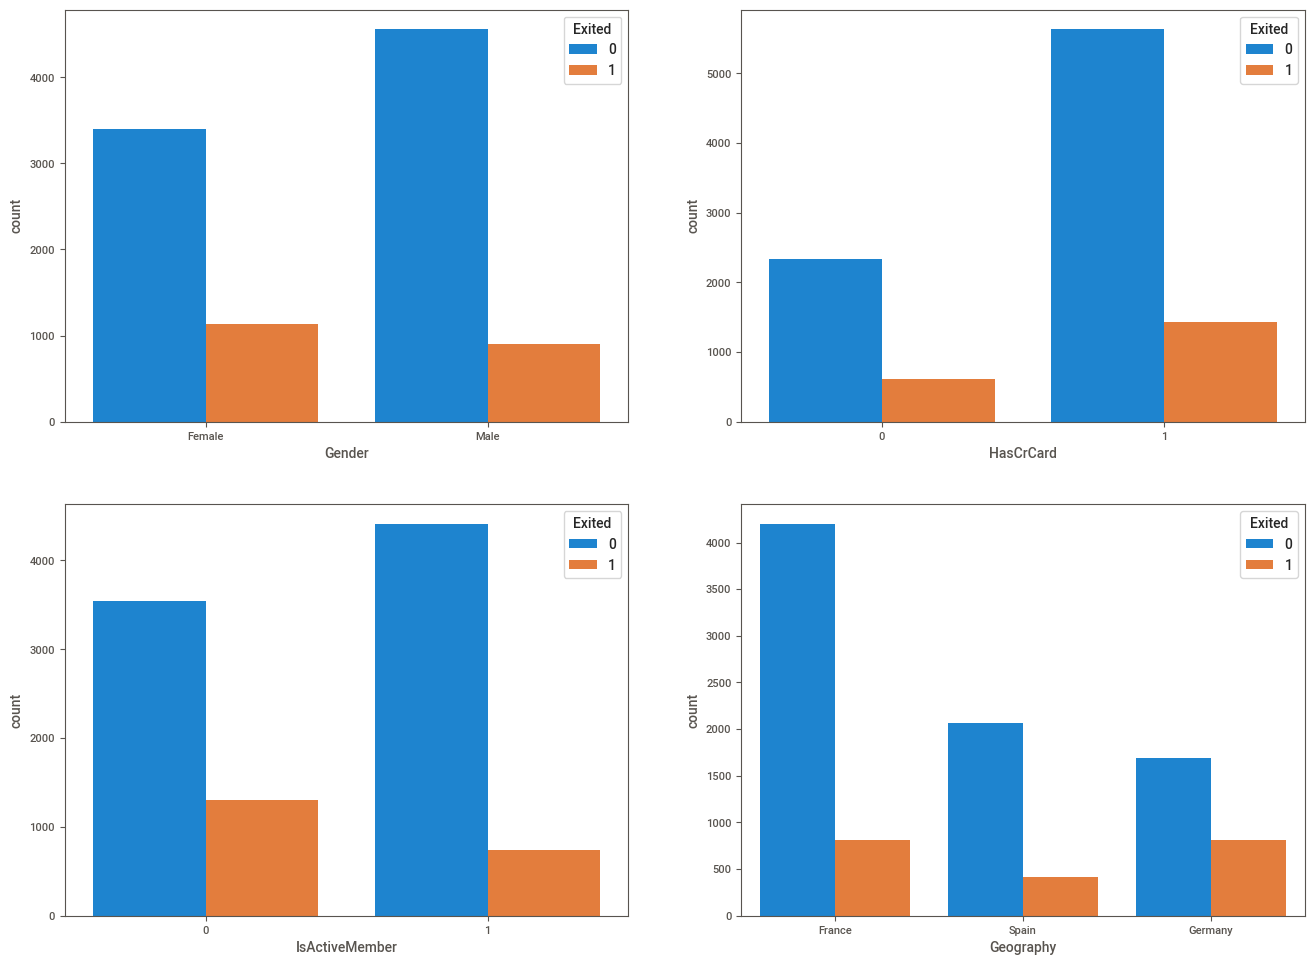

In [32]:
cat_list = ["Gender", "HasCrCard", "IsActiveMember", "Geography"]
index = 0
plt.figure(figsize=(16, 12))
for i in cat_list:
    index += 1
    plt.subplot(2, 2, index)
    sns.countplot(data=df, x=i, hue="Exited")

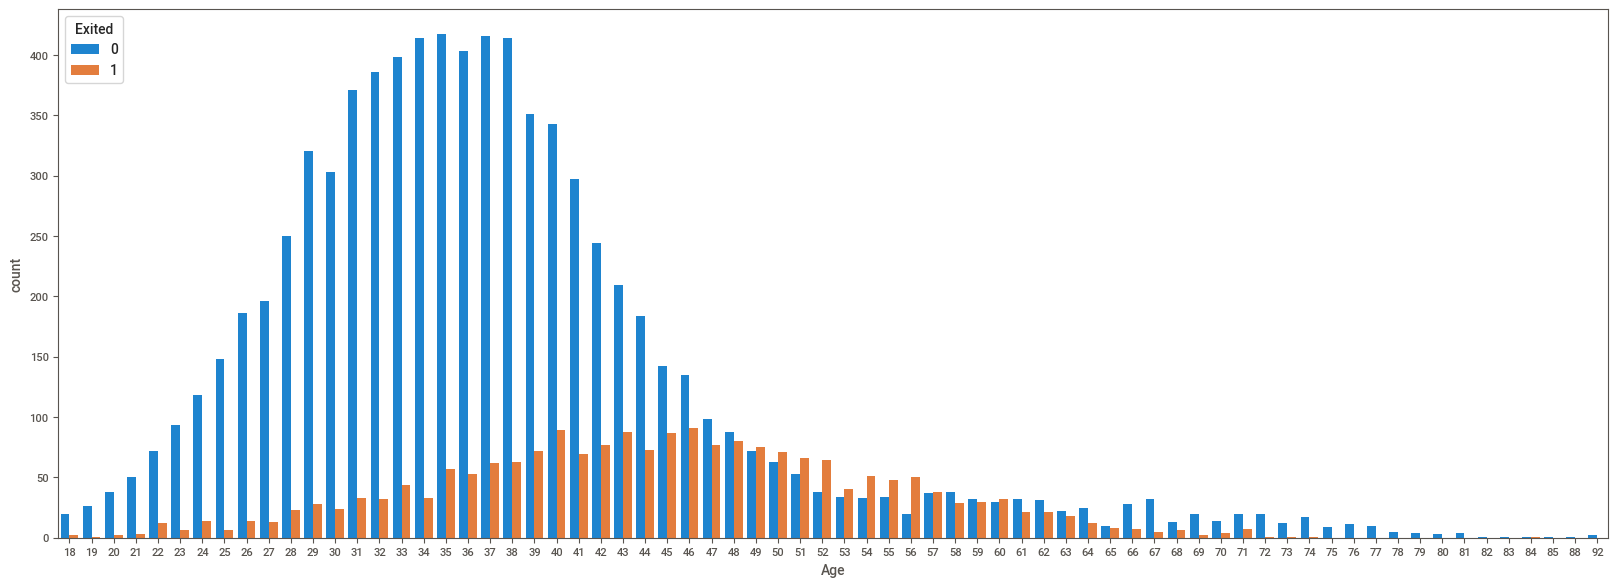

In [33]:
plt.figure(figsize=(20, 7))
sns.countplot(df.Age, hue=df.Exited);

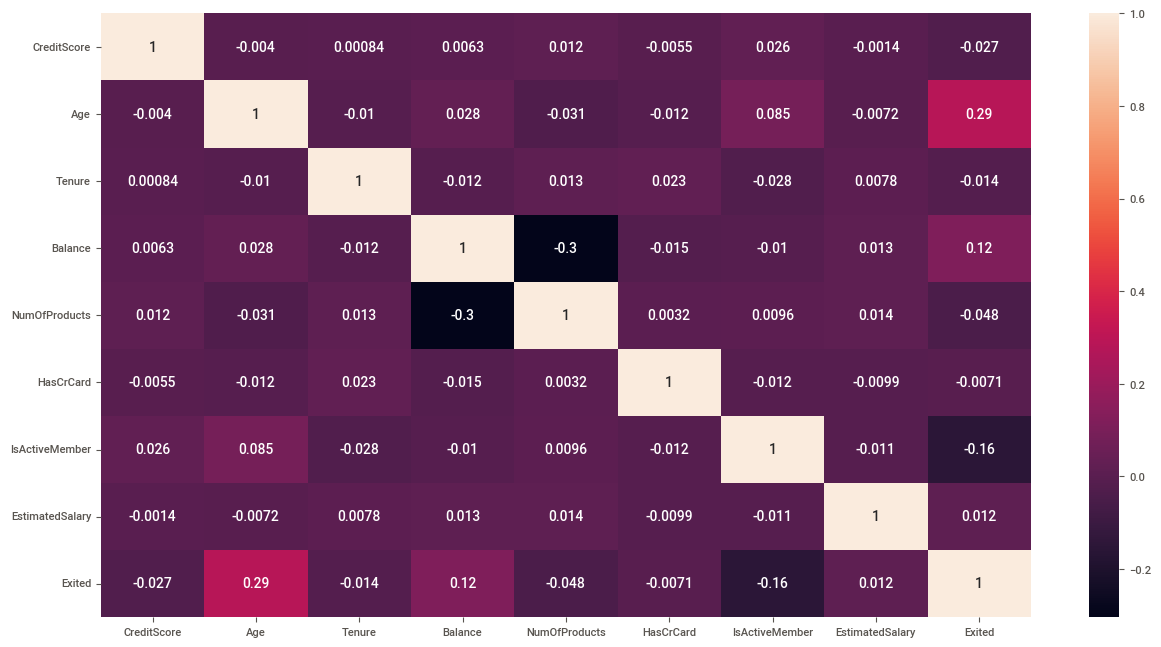

In [34]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [35]:
df_temp = df.corr()  

feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .90 and df_temp[col][i] < 1) or (df_temp[col][i]< -.90 and df_temp[col][i] > -1) : 
                feature.append(col)
                collinear.append(i)
                print(f"multicolinearity alert in between {col} - {i}")

In [36]:
df.sample(50).T

,6260,101,6498,8025,3603,4410,6073,7814,6806,2989,3915,7539,1737,5631,9977,8553,6902,3183,6655,9200,6471,185,3538,90,704,6063,8293,3404,919,404,7741,6434,5662,9305,7940,3502,6205,6858,2861,6365,9944,7800,1610,4997,7080,9792,1730,8643,7079,9446
CreditScore,666,623,613,655,750,503,471,647,478,703,686,755,769,632,683,682,457,636,554,739,850,514,554,647,659,762,766,573,552,685,441,628,703,662,781,735,497,576,525,743,744,698,588,722,628,819,850,754,595,544
Geography,France,France,France,France,France,Germany,Germany,Germany,France,Spain,Germany,France,Spain,France,France,Spain,Spain,France,France,France,France,France,Germany,Spain,Germany,France,Germany,France,Spain,France,France,France,France,France,Spain,Germany,France,Germany,France,Spain,Germany,Germany,France,Spain,Germany,Spain,France,Spain,Germany,France
Gender,Female,Female,Female,Male,Female,Male,Female,Female,Male,Female,Male,Male,Male,Male,Female,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male,Male,Female,Female,Male,Male,Male,Female,Female,Female,Female,Male,Female,Male,Female,Female,Male,Female,Female,Male,Female,Female,Male,Male,Male,Male
Age,32,44,27,24,47,42,36,33,35,45,43,42,39,40,32,58,44,43,44,30,40,32,43,44,36,31,28,23,45,23,60,45,40,39,29,46,29,46,25,48,41,52,24,43,51,28,20,40,30,30
Tenure,10,6,5,9,7,9,5,3,1,1,2,2,9,5,9,4,7,6,7,6,5,8,2,5,2,7,4,2,9,8,1,8,7,5,6,2,4,4,6,5,7,1,0,1,10,8,7,2,9,4
Balance,112536.570,0.000,125167.740,107065.310,121376.150,153279.390,90063.740,168560.460,92474.050,0.000,134896.030,119919.120,0.000,147650.680,0.000,0.000,0.000,0.000,85304.270,0.000,0.000,0.000,120847.110,0.000,76190.480,117687.350,90696.780,0.000,0.000,0.000,140614.150,0.000,0.000,139562.050,98759.890,106344.950,85646.810,137367.940,0.000,118207.690,190409.340,107906.750,0.000,0.000,115280.490,168253.210,0.000,160625.170,130682.110,73218.890
NumOfProducts,2,2,1,1,2,1,2,2,1,1,1,1,1,1,2,1,2,2,1,1,2,2,1,3,2,1,1,1,2,2,1,2,2,2,1,1,1,1,2,2,2,1,2,1,2,1,2,1,2,1
HasCrCard,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,0,1,1,1,0,1,0,1,0,1,0,1,1,0,1,1,1,1,0,1,1,0,1,0
IsActiveMember,1,0,0,1,0,1,1,0,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,1,1,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,1,1
EstimatedSalary,34350.540,167162.430,199104.520,51959.820,54473.600,151336.960,96366.700,90270.160,178626.070,182784.110,97847.050,156868.210,47722.790,199674.830,24991.920,176036.010,185992.360,43128.950,58076.520,122604.440,35034.150,95857.180,7611.610,174205.220,149066.140,159344.430,21597.200,122964.180,26752.560,112239.030,174381.230,193903.060,122518.500,61636.220,112202.640,114371.330,63233.020,33450.110,89566.640,186489.140,138361.480,168886.390,140586.080,44560.170,12628.610,102799.140,31288.770,3554.630,57862.880,126796.690


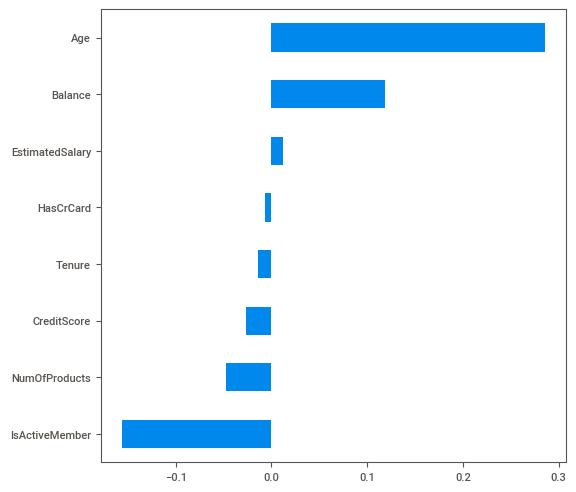

In [37]:
plt.figure(figsize = (6,6))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind = "barh");
# df.corr()['Exited'][:-1].sort_values().plot.barh()

In [38]:
df=pd.get_dummies(df)

In [39]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,1,0,0,1,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,0,1,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,1,0,0,1,0
3,699,39,1,0.000,2,0,0,93826.630,0,1,0,0,1,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,0,1,1,0


In [40]:
df2=df.copy()

## Preprocessing of Data
- Train | Test Split, Scalling

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [42]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

In [43]:
X.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,1,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,1,0
3,699,39,1,0.000,2,0,0,93826.630,1,0,0,1,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,1,0


In [44]:
seed = 42

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

In [46]:
X_train.shape

(9000, 13)

In [47]:
X_test.shape

(1000, 13)

In [48]:
scaler = MinMaxScaler()

In [49]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

### Import related libraries

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

### Creating Model

### without class_weigth

In [51]:
model = Sequential()
tf.random.set_seed(seed)

model.add(Dense(24, activation = "relu", input_dim = X_train.shape[1])) # input dim burada oluşturunca ağırlıklar atanıyor.
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid")) # binary olduğundan sigmoid kullandın

opt = Adam(lr=0.001)
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

# Recall — the percentage of positive cases you caught
# Recall, false negative’in gözardı edilemez olduğu durumlarda önemli bir metrik. recall = TP / TP +FN
# Recall’a bakma sebebimiz tamamiyle paydadaki false negative’ler, yani hesabına devam ettiği tahmin edilen ve hesabını kapatan insanlar. 

In [52]:
early_stop = EarlyStopping(monitor="val_loss", mode="auto", verbose=1, patience=30)
#The patience is often set somewhere between 10 and 100 (10 or 20 is more common), but it really depends on your dataset and network.

In [53]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, epochs = 200, verbose=1, callbacks=[early_stop])

Epoch 1/200
127/127 [==============================] - 2s 7ms/step - loss: 0.5375 - recall: 0.0454 - val_loss: 0.4780 - val_recall: 0.0000e+00
Epoch 2/200
127/127 [==============================] - 0s 3ms/step - loss: 0.4786 - recall: 0.0000e+00 - val_loss: 0.4634 - val_recall: 0.0000e+00
Epoch 3/200
127/127 [==============================] - 0s 3ms/step - loss: 0.4659 - recall: 0.0315 - val_loss: 0.4461 - val_recall: 0.0718
Epoch 4/200
127/127 [==============================] - 0s 3ms/step - loss: 0.4513 - recall: 0.0684 - val_loss: 0.4296 - val_recall: 0.1713
Epoch 5/200
127/127 [==============================] - 0s 3ms/step - loss: 0.4406 - recall: 0.1368 - val_loss: 0.4193 - val_recall: 0.1160
Epoch 6/200
127/127 [==============================] - 0s 4ms/step - loss: 0.4325 - recall: 0.1634 - val_loss: 0.4085 - val_recall: 0.2099
Epoch 7/200
127/127 [==============================] - 0s 4ms/step - loss: 0.4268 - recall: 0.2088 - val_loss: 0.4037 - val_recall: 0.2210
Epoch 8/200
127

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                336       
                                                                 
 dense_1 (Dense)             (None, 16)                400       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 881
Trainable params: 881
Non-trainable params: 0
_________________________________________________________________


In [55]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.538,0.045,0.478,0.000
1,0.479,0.000,0.463,0.000
2,0.466,0.031,0.446,0.072
3,0.451,0.068,0.430,0.171
4,0.441,0.137,0.419,0.116


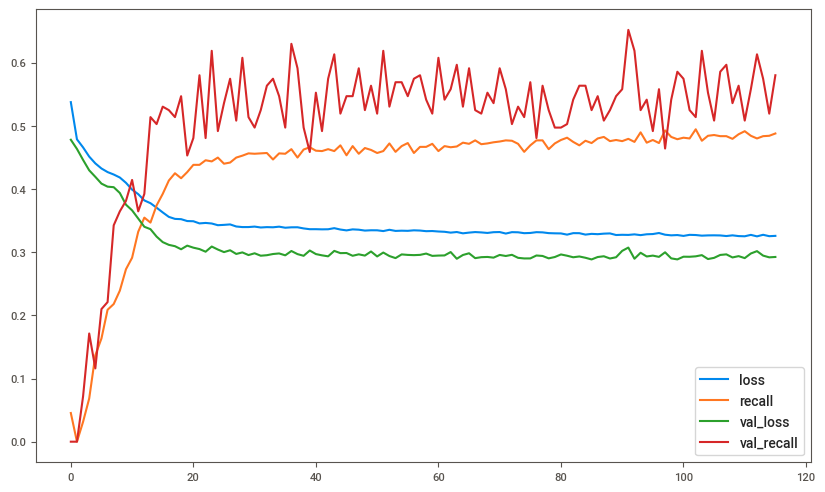

In [56]:
loss_df.plot();

In [57]:
model.evaluate(X_test, y_test, verbose=0)

[0.3343442678451538, 0.4901960790157318]

In [58]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[762  34]
 [104 100]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       796
           1       0.75      0.49      0.59       204

    accuracy                           0.86      1000
   macro avg       0.81      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



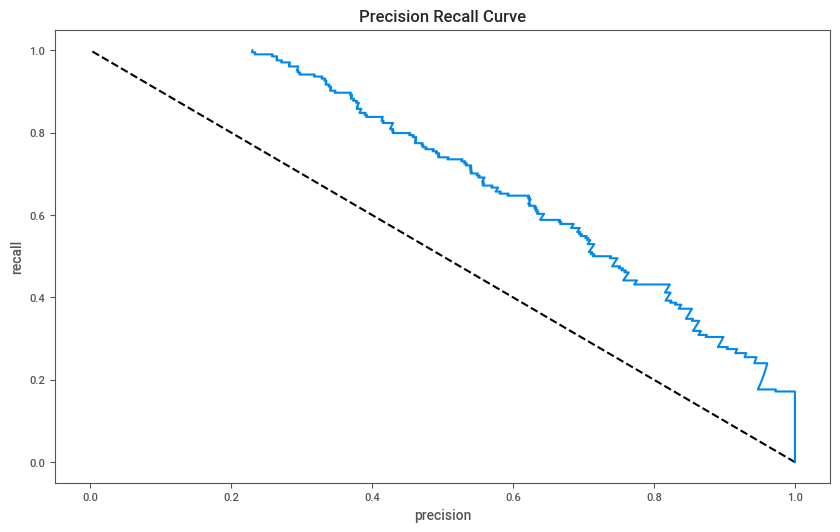

In [59]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--') 
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show();

In [60]:
average_precision_score(y_test, y_pred_proba)

0.7029914420792599

### with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [61]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [62]:

# class_weight = {0:1, 1:1.5}
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 30) 

In [63]:
tf.random.set_seed(seed)
model_w = Sequential()

model_w.add(Dense(24, activation = "relu", input_dim = X_train.shape[1])) 
model_w.add(Dense(16, activation = "relu"))
model_w.add(Dense(8, activation = "relu"))
model_w.add(Dense(1, activation = "sigmoid")) 

opt = Adam(lr = 0.001)
model_w.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [64]:
model_w.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, class_weight=class_weights, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
127/127 [==============================] - 3s 8ms/step - loss: 0.6712 - recall: 0.6356 - val_loss: 0.6350 - val_recall: 0.5967
Epoch 2/1000
127/127 [==============================] - 0s 4ms/step - loss: 0.6385 - recall: 0.6102 - val_loss: 0.6622 - val_recall: 0.7403
Epoch 3/1000
127/127 [==============================] - 0s 3ms/step - loss: 0.6214 - recall: 0.6544 - val_loss: 0.6186 - val_recall: 0.7348
Epoch 4/1000
127/127 [==============================] - 1s 5ms/step - loss: 0.6022 - recall: 0.6840 - val_loss: 0.6351 - val_recall: 0.7790
Epoch 5/1000
127/127 [==============================] - 0s 4ms/step - loss: 0.5899 - recall: 0.6931 - val_loss: 0.5283 - val_recall: 0.6464
Epoch 6/1000
127/127 [==============================] - 1s 5ms/step - loss: 0.5793 - recall: 0.6973 - val_loss: 0.5155 - val_recall: 0.6519
Epoch 7/1000
127/127 [==============================] - 1s 4ms/step - loss: 0.5705 - recall: 0.7046 - val_loss: 0.4958 - val_recall: 0.6685
Epoch 8/1000
127/127

#### Evaluate

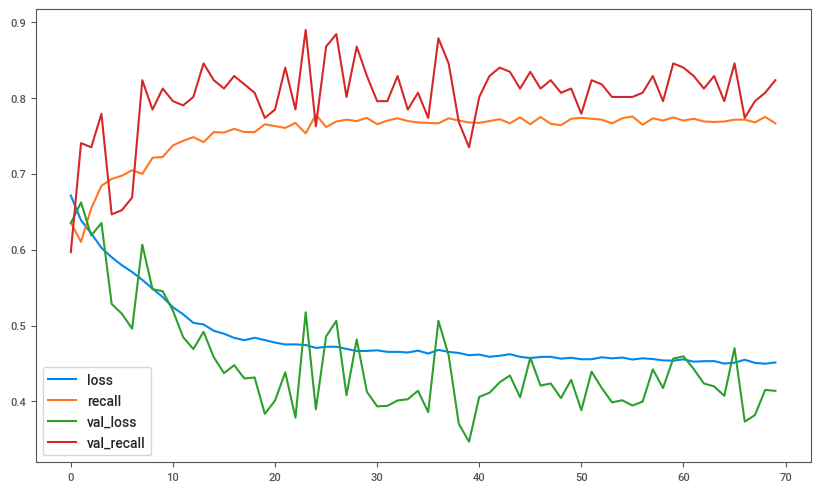

In [65]:
loss_df = pd.DataFrame(model_w.history.history)
loss_df.plot();

In [66]:
loss, recall = model_w.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("Recall : ", recall)

loss :  0.45655348896980286
Recall :  0.7843137383460999


In [67]:
y_pred = (model_w.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[619 177]
 [ 44 160]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85       796
           1       0.47      0.78      0.59       204

    accuracy                           0.78      1000
   macro avg       0.70      0.78      0.72      1000
weighted avg       0.84      0.78      0.80      1000



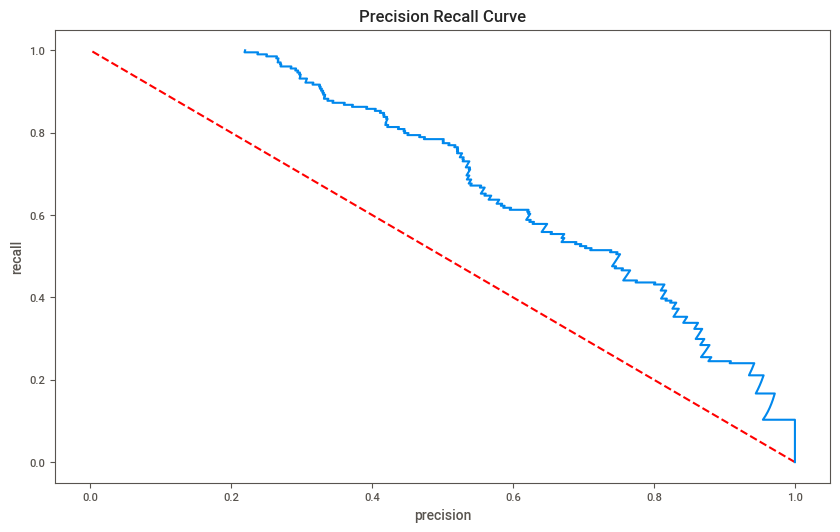

In [68]:
y_pred_proba = model_w.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'r--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show();


In [69]:
average_precision_score(y_test, y_pred_proba)

0.6920608950021179

## crossvalidate

In [70]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [71]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(24, activation = "relu", input_dim = X_train.shape[1])) 
    classifier.add(Dense(16, activation = "relu"))
    classifier.add(Dense(8, activation = "relu"))
    classifier.add(Dense(1, activation = "sigmoid"))
    opt = Adam(lr = 0.001)
    classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [72]:
tf.random.set_seed(seed)

classifier_model = KerasClassifier(build_fn = build_classifier, batch_size = 64, epochs = 100, verbose=0)

scores = cross_validate(estimator = classifier_model, X = X_train, y = y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 5)

df_scores = pd.DataFrame(scores, index = range(1, 6)).iloc[:, 2:] 

df_scores

,test_accuracy,test_precision,test_recall,test_f1
1,0.843,0.691,0.470,0.559
2,0.862,0.769,0.499,0.605
3,0.852,0.713,0.386,0.501
4,0.863,0.723,0.479,0.576
5,0.872,0.828,0.488,0.614


In [73]:
df_scores_summary = pd.DataFrame({"score_mean" : df_scores.mean().values, "score_std" : df_scores.std().values},
                                 index = ["acc", "pre", "rec", "f1"])

df_scores_summary

,score_mean,score_std
acc,0.859,0.011
pre,0.745,0.055
rec,0.464,0.045
f1,0.571,0.045


## GridSearchCV

In [74]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam, SGD

In [75]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(24, activation = "relu", input_dim = X_train.shape[1])) # input dim burada oluşturunca ağırlıklar atanıyor.
    classifier.add(Dense(16, activation = "relu"))
    classifier.add(Dense(8, activation = "relu"))
    classifier.add(Dense(1, activation = "sigmoid"))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [76]:
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "auto", verbose = 1, patience = 15)

In [77]:
tf.random.set_seed(seed)

classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 100) # 200

parameters = {'batch_size': [128, 64],
              'optimizer': [Adam, Nadam, SGD], #[Adam, RMSprop, Adadelta, Nadam, SGD],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 5,
                          n_jobs = -1,
                          verbose = 1)

In [78]:
grid_model.fit(X_train, y_train, class_weight=class_weights)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Epoch 1/100
64/64 [==============================] - 2s 10ms/step - loss: 0.6596 - recall: 0.6344 - val_loss: 0.6135 - val_recall: 0.6298
Epoch 2/100
64/64 [==============================] - 0s 3ms/step - loss: 0.6292 - recall: 0.6308 - val_loss: 0.6407 - val_recall: 0.7459
Epoch 3/100
64/64 [==============================] - 0s 3ms/step - loss: 0.6018 - recall: 0.6743 - val_loss: 0.6156 - val_recall: 0.8011
Epoch 4/100
64/64 [==============================] - 0s 3ms/step - loss: 0.5758 - recall: 0.7082 - val_loss: 0.6156 - val_recall: 0.8177
Epoch 5/100
64/64 [==============================] - 0s 5ms/step - loss: 0.5604 - recall: 0.7209 - val_loss: 0.4691 - val_recall: 0.6906
Epoch 6/100
64/64 [==============================] - 0s 4ms/step - loss: 0.5350 - recall: 0.7294 - val_loss: 0.4405 - val_recall: 0.7238
Epoch 7/100
64/64 [==============================] - 0s 4ms/step - loss: 0.5130 - recall: 0.7542 - val_loss: 0.4181 

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x00000219FD2E7C70>,
             n_jobs=-1,
             param_grid={'batch_size': [128, 64],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizer_v2.nadam.Nadam'>,
                                       <class 'keras.optimizer_v2.gradient_descent.SGD'>]},
             scoring='recall', verbose=1)

In [79]:
grid_model.best_score_

0.7583096507229058

In [80]:
grid_model.best_params_

{'batch_size': 128,
 'learn_rate': 0.003,
 'optimizer': keras.optimizer_v2.adam.Adam}

In [81]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]] # .sort_values() 
grid_result  # grid_result.sort_values(by='rank_test_score')

,mean_test_score,std_test_score,rank_test_score,params
0,0.725,0.037,9,"{'batch_size': 128, 'learn_rate': 0.001, 'opti..."
1,0.737,0.034,5,"{'batch_size': 128, 'learn_rate': 0.001, 'opti..."
2,0.557,0.114,17,"{'batch_size': 128, 'learn_rate': 0.001, 'opti..."
3,0.758,0.056,1,"{'batch_size': 128, 'learn_rate': 0.003, 'opti..."
4,0.722,0.041,10,"{'batch_size': 128, 'learn_rate': 0.003, 'opti..."
5,0.592,0.066,16,"{'batch_size': 128, 'learn_rate': 0.003, 'opti..."
6,0.729,0.055,8,"{'batch_size': 128, 'learn_rate': 0.005, 'opti..."
7,0.742,0.047,2,"{'batch_size': 128, 'learn_rate': 0.005, 'opti..."
8,0.668,0.021,15,"{'batch_size': 128, 'learn_rate': 0.005, 'opti..."
9,0.734,0.032,7,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."


#### Evaluate

## ROC (Receiver Operating Curve) and AUC (Area Under Curve) for grid_model

In [82]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve


for Gridsearch model

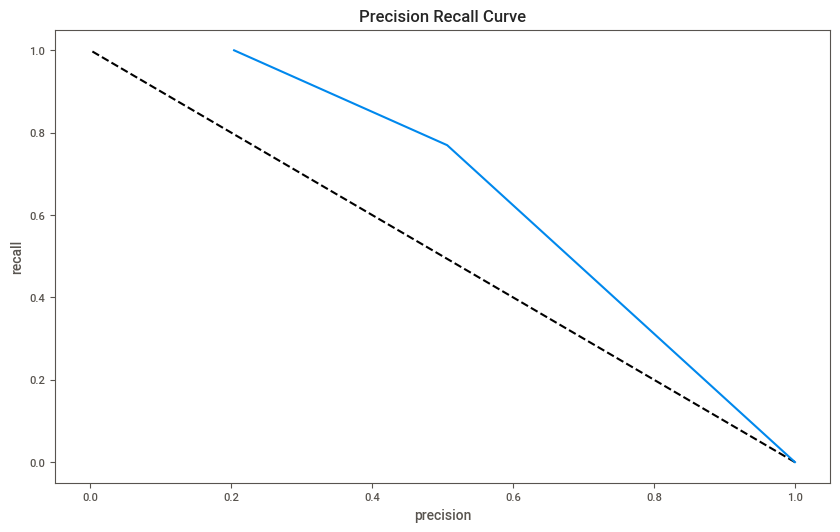

In [83]:
y_pred_proba = grid_model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show();

In [84]:
average_precision_score(y_test, y_pred_proba)

0.4367691334598356

## Final Model and Model Deployment

In [85]:
import pickle
pickle.dump(scaler, open("scaler_churn_ANN", 'wb'))

In [86]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 30) 

In [87]:
tf.random.set_seed(seed)

final_model = Sequential()
final_model.add(Dense(24, activation = "relu", input_dim = X_train.shape[1])) 
final_model.add(Dense(16, activation = "relu"))
final_model.add(Dense(8, activation = "relu"))
final_model.add(Dense(1, activation = "sigmoid")) 
final_model.compile(optimizer=Adam(learning_rate=0.001), loss = "binary_crossentropy", metrics = ["Recall"])

In [88]:
final_model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 64, class_weight=class_weights, epochs = 200, verbose = 1, # predicte validation data ile  kullanıyorsun, 
          callbacks=[early_stop])

Epoch 1/200
141/141 [==============================] - 2s 8ms/step - loss: 0.6697 - recall: 0.5586 - val_loss: 0.6530 - val_recall: 0.6127
Epoch 2/200
141/141 [==============================] - 1s 4ms/step - loss: 0.6311 - recall: 0.6328 - val_loss: 0.6209 - val_recall: 0.5980
Epoch 3/200
141/141 [==============================] - 1s 4ms/step - loss: 0.6116 - recall: 0.6628 - val_loss: 0.6744 - val_recall: 0.7941
Epoch 4/200
141/141 [==============================] - 0s 3ms/step - loss: 0.5918 - recall: 0.6847 - val_loss: 0.6261 - val_recall: 0.7255
Epoch 5/200
141/141 [==============================] - 0s 3ms/step - loss: 0.5738 - recall: 0.6934 - val_loss: 0.5567 - val_recall: 0.6618
Epoch 6/200
141/141 [==============================] - 0s 3ms/step - loss: 0.5610 - recall: 0.7059 - val_loss: 0.5993 - val_recall: 0.7500
Epoch 7/200
141/141 [==============================] - 0s 3ms/step - loss: 0.5446 - recall: 0.7147 - val_loss: 0.5643 - val_recall: 0.7500
Epoch 8/200
141/141 [======

<AxesSubplot:>

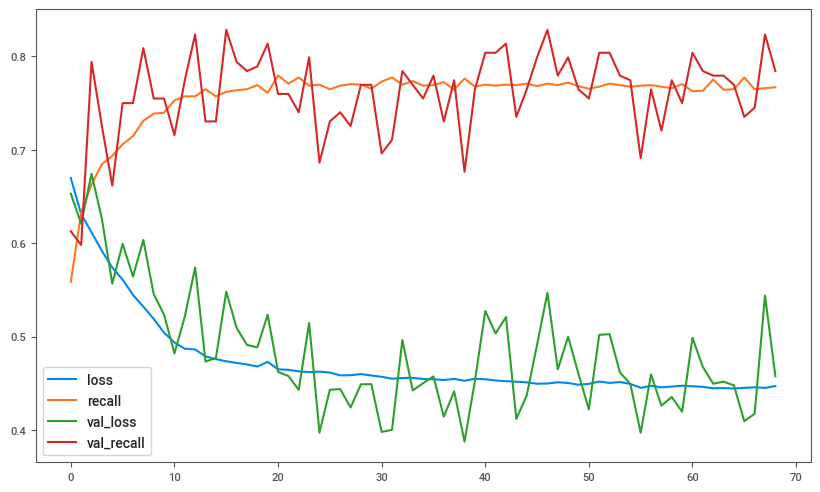

In [89]:
loss_df = pd.DataFrame(final_model.history.history)
loss_df.plot()

In [90]:
final_model.evaluate(X_test, y_test, verbose=0)

[0.4575543999671936, 0.7843137383460999]

In [91]:
loss, recall = final_model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("Recall : ", recall)

loss :  0.4575543999671936
Recall :  0.7843137383460999


In [92]:
y_pred = (final_model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[628 168]
 [ 44 160]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.86       796
           1       0.49      0.78      0.60       204

    accuracy                           0.79      1000
   macro avg       0.71      0.79      0.73      1000
weighted avg       0.84      0.79      0.80      1000



In [93]:
final_model.save('model_churn_prediction_ANN.h5')

### Prediction

In [94]:
from tensorflow.keras.models import load_model

In [95]:
df


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,1,0,0,1,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,0,1,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,1,0,0,1,0
3,699,39,1,0.000,2,0,0,93826.630,0,1,0,0,1,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.000,2,1,0,96270.640,0,1,0,0,0,1
9996,516,35,10,57369.610,1,1,1,101699.770,0,1,0,0,0,1
9997,709,36,7,0.000,1,0,1,42085.580,1,1,0,0,1,0
9998,772,42,3,75075.310,2,1,0,92888.520,1,0,1,0,0,1


In [96]:
pickle.dump(scaler, open("scaler_churn_ANN", 'wb'))

In [97]:
model_churn = load_model('model_churn_prediction_ANN.h5')
scaler_churn = pickle.load(open("scaler_churn_ANN", "rb"))

In [98]:
my_dict = {"CreditScore":[619], "Age": [42],	"Tenure":[2], "Balance":[0.000],
           "NumOfProducts": [1], "HasCrCard":[1], "IsActiveMember":[1],  "EstimatedSalary": [101348.880], "Geography": ["France"], "Gender": 1}

In [99]:
X.columns


Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [100]:
sample = pd.DataFrame(my_dict)
sample

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography,Gender
0,619,42,2,0.000,1,1,1,101348.880,France,1


In [101]:
sample_dummy=pd.get_dummies(sample)
sample_dummy

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender,Geography_France
0,619,42,2,0.000,1,1,1,101348.880,1,1


In [102]:
sample_dummy = sample_dummy.reindex(columns=X.columns, fill_value=0)
sample_dummy

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,0,0


In [103]:
sample_scaled = scaler_churn.transform(sample_dummy.values)
sample_scaled

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 1.        , 0.        ,
        0.        , 0.        , 0.        ]])

In [104]:
model_churn.predict(sample_scaled)

array([[0.95495945]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___